# Data Processing Approach for Portfolio Project

## Project Title: Plant Pest and Disease Detection

## Student Name: Smart Israel

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   **For this project, the primary dataset was sourced from Kaggle, a widely recognized platform for data science and machine learning datasets. The specific dataset, titled "Rice Leaf Diseases," contains labeled images of rice leaves affected by various diseases such as Bacterial Blight, Blast, Brown Spot, and False Smut. The dataset is well-organized, with images grouped into subdirectories based on disease type, making it suitable for supervised learning tasks.
Kaggle Dataset Link: Rice Leaf Diseases Dataset

While Kaggle provided an excellent starting point, relying solely on a single source has limitations. To address this, the dataset could be supplemented in the future by exploring additional sources such as agricultural research institutes, peer-reviewed studies, and government open data portals. These external sources would enhance the dataset's diversity and representativeness, improving the model's generalization to real-world scenarios. **
   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   **Since Kaggle was the sole source of data for this project, no aggregation was performed from multiple sources. However, the dataset itself required careful preprocessing and augmentation to ensure it was comprehensive and robust for training purposes. Techniques such as data augmentation were employed to simulate variability and compensate for the lack of additional data sources.

Moving forward, aggregating data from multiple sources would be a valuable enhancement to this project. This could involve combining the Kaggle dataset with field-collected images or publicly available datasets from platforms like PlantVillage or agricultural research organizations. Aggregation would allow for a more holistic dataset that accounts for differences in geographic conditions, disease stages, and image quality, ultimately leading to better model performance in diverse settings. **



In [5]:
#imported the necessary libraries
!pip install opencv-python
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [6]:
base_dir = '../Smartel_Farmer_Life_Line/Rice_Diseases'
categories = ['Bacterial Blight Disease', 'Blast Disease', 'Brown Spot Disease', 'False Smut Disease']
def load_images(base_dir, categories, img_size=(128, 128)):
    images = []
    labels = []
    for category in categories:
        category_path = os.path.join(base_dir, category)
        for filename in os.listdir(category_path):
            if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
                img_path = os.path.join(category_path, filename)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(category)
    return np.array(images), np.array(labels)

images, labels = load_images(base_dir, categories)



2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **The dataset consists of .png images of rice leaves, organized into subdirectories representing each disease category: Bacterial Blight, Blast, Brown Spot, and False Smut. The images vary in resolution and dimensions, requiring standardization for machine learning. Transformations included resizing all images to 224x224 pixels to meet the input requirements of the VGG16 model, normalizing pixel values to the range [0, 1], and applying categorical encoding to convert disease labels into one-hot vectors suitable for classification tasks.

Additionally, data augmentation was applied to enhance variability and combat overfitting. This included techniques such as rotation, horizontal flipping, zooming, and shifting. These transformations ensured uniformity, improved the dataset’s representativeness, and prepared it for effective training and evaluation. **

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
  **The dataset includes .png images as input features and categorical labels representing disease types as target variables. During EDA, the distribution of images across disease categories was analyzed, revealing any class imbalances. Image statistics such as mean and standard deviation were calculated, and visual inspections of image quality helped detect anomalies or inconsistencies. This process provided insights into the dataset's structure and readiness for preprocessing.

Class distribution was visualized using bar plots, and sample images from each category were displayed to understand disease characteristics. Outliers, such as images with extreme pixel values or poor quality, were identified and addressed. By summarizing these insights, the dataset was prepared for the subsequent transformations and modeling pipeline, ensuring a solid foundation for machine learning tasks.**


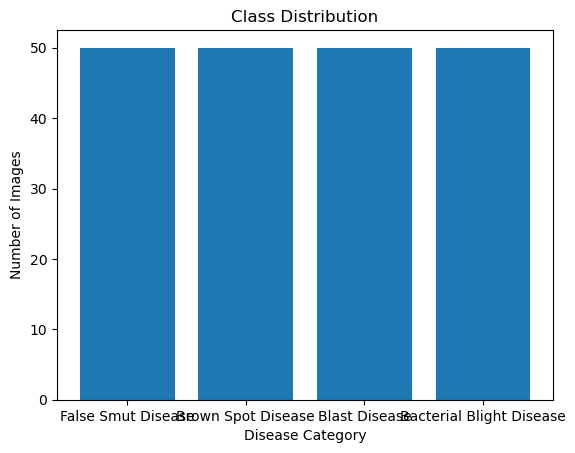

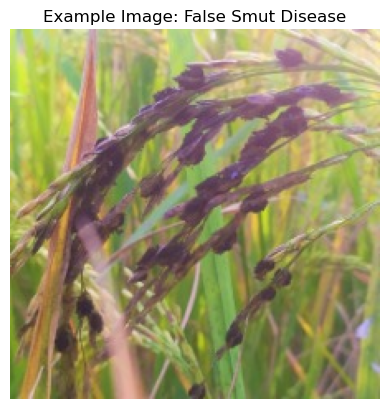

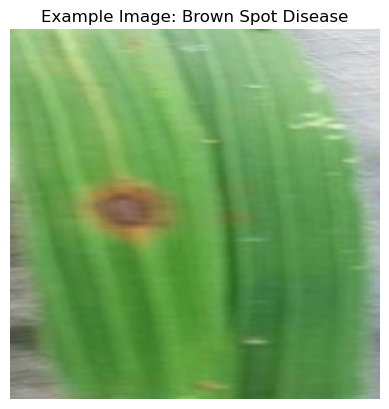

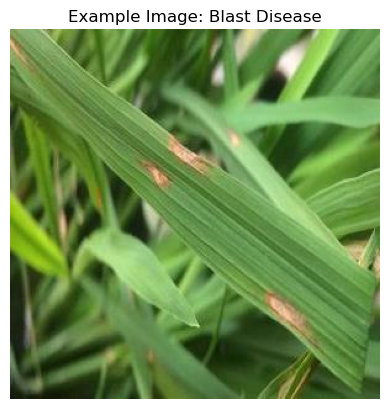

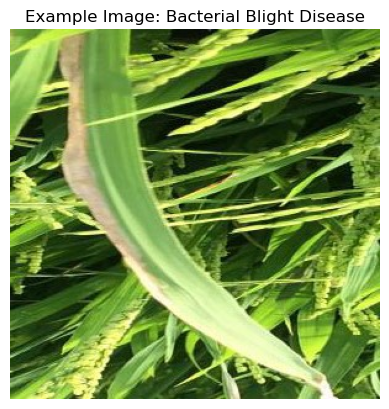

Mean Pixel Value: 0.43700517329327576
Standard Deviation: 0.2179720937838505


In [15]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to dataset
data_dir = base_dir

# Load image file paths and labels
categories = [category for category in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, category))]
image_counts = {}

for category in categories:
    category_path = os.path.join(data_dir, category)
    image_counts[category] = len(os.listdir(category_path))

# Plot class distribution
plt.bar(image_counts.keys(), image_counts.values())
plt.xlabel('Disease Category')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

# Display a few example images
for category in categories:
    category_path = os.path.join(data_dir, category)
    sample_image = cv2.imread(os.path.join(category_path, os.listdir(category_path)[0]))
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    plt.imshow(sample_image)
    plt.title(f'Example Image: {category}')
    plt.axis('off')
    plt.show()

# Calculate mean and standard deviation for normalization
all_pixels = []
for category in categories:
    category_path = os.path.join(data_dir, category)
    for img_file in os.listdir(category_path):
        img = cv2.imread(os.path.join(category_path, img_file))
        img_resized = cv2.resize(img, (224, 224))
        all_pixels.append(img_resized / 255.0)

all_pixels = np.array(all_pixels)
mean_pixel_value = np.mean(all_pixels)
std_pixel_value = np.std(all_pixels)

print(f"Mean Pixel Value: {mean_pixel_value}")
print(f"Standard Deviation: {std_pixel_value}")






4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.
  


   Hypothesis 1
Different rice diseases exhibit unique visual patterns, such as color and lesion shapes, making it possible to distinguish them using extracted image features. To test this hypothesis, clustering methods like k-means can be applied to the extracted image features. By observing how well the resulting clusters align with predefined disease classes, it is possible to evaluate whether the visual features are distinct enough for classification.

    Hypothesis 2
Data augmentation, such as rotation, flipping, or zooming, improves the model's ability to generalize and increases classification accuracy. To test this, the model can be trained twice—once with augmented data and once without. Performance metrics like accuracy, precision, and F1-score on the validation dataset are then compared. If the model trained with augmentation consistently achieves higher scores, it would confirm the hypothesis that augmentation enhances the model's ability to generalize.

**

5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   **Insert code for Handling Sparse/Dense Data and Outliers below**

In [22]:
# Check class distribution
categories = [c for c in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, c))]
class_counts = {c: len(os.listdir(os.path.join(data_dir, c))) for c in categories}
print("Class Distribution:", class_counts)

# Detect and remove outliers
for category in categories:
    for img_file in os.listdir(os.path.join(data_dir, category)):
        img = cv2.imread(os.path.join(data_dir, category, img_file))
        if img is None or img.mean() < 10:  # Remove corrupted or dark images
            os.remove(os.path.join(data_dir, category, img_file))

# Normalize pixel values
all_images = []
for category in categories:
    for img_file in os.listdir(os.path.join(data_dir, category)):
        img = cv2.imread(os.path.join(data_dir, category, img_file)) / 255.0
        all_images.append(img)


Class Distribution: {'False Smut Disease': 50, 'Brown Spot Disease': 50, 'Blast Disease': 50, 'Bacterial Blight Disease': 50}


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **Your answer for Hypothesis Testing goes here **



8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [**insert text for preprocessing steps**]


In [ ]:
#print out relevant features


10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.